In [ ]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision


In [ ]:
import clip
import torch
from PIL import Image

# Carregar o modelo CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 61.9MiB/s]


In [ ]:
from google.colab import files
from PIL import Image

# Fazer o upload da imagem
uploaded = files.upload()

# Abrir a imagem após o upload
image_path = next(iter(uploaded))  # Pegando o nome do arquivo
image = Image.open(image_path)

# Exibir a imagem carregada
image.show()


Saving shirt.jpg to shirt.jpg


In [ ]:
# Pré-processar a imagem e gerar as características (embeddings) usando o CLIP
image_input = preprocess(image).unsqueeze(0).to(device)  # Preprocessa e move para o dispositivo (GPU ou CPU)

# Gerar o embedding da imagem
with torch.no_grad():  # Não precisamos calcular gradientes
    image_features = model.encode_image(image_input)

# Normalizar o embedding
image_features = image_features / image_features.norm(dim=-1, keepdim=True)

# Exibir o vetor de características gerado
print("Embedding gerado para a imagem:", image_features)


In [ ]:
import numpy as np

# Carregar um subset pequeno do Fashion MNIST para comparação (exemplo)
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Pre-processar as imagens do dataset e gerar embeddings
dataset_embeddings = []

for img in train_images[:1000]:  # Usar apenas um subset de 1000 imagens para acelerar
    img = Image.fromarray(img)  # Converter de array para imagem
    img = preprocess(img).unsqueeze(0).to(device)  # Pré-processamento
    with torch.no_grad():
        img_features = model.encode_image(img)
    img_features = img_features / img_features.norm(dim=-1, keepdim=True)  # Normalizar
    dataset_embeddings.append(img_features.cpu().numpy())

# Converter para numpy array para fácil comparação
dataset_embeddings = np.array(dataset_embeddings)


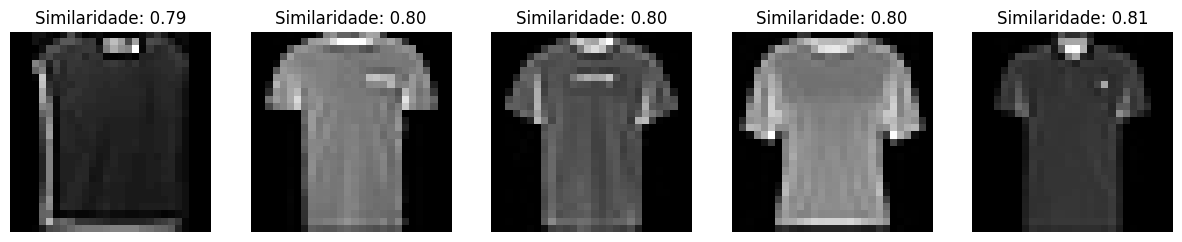

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Calcular a similaridade entre o embedding da imagem enviada e os embeddings do dataset
similarities = cosine_similarity(image_features.cpu().numpy(), dataset_embeddings.reshape(len(dataset_embeddings), -1))

# Encontrar os 5 índices das imagens mais semelhantes
top_5_indices = similarities.argsort()[0][-5:]

# Exibir as 5 imagens mais semelhantes
plt.figure(figsize=(15, 10))
for i, idx in enumerate(top_5_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f'Similaridade: {similarities[0][idx]:.2f}')
    plt.axis('off')

plt.show()


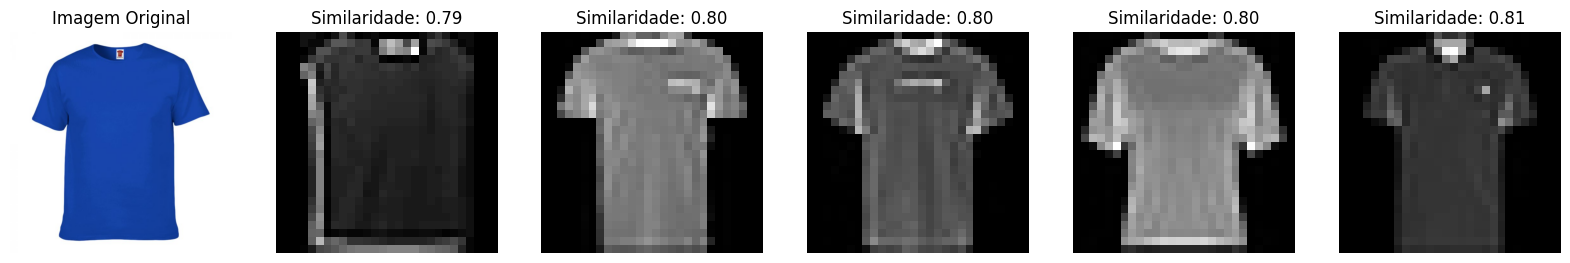

In [ ]:
# Exibir a imagem original junto com as 5 mais semelhantes
plt.figure(figsize=(20, 10))

# Exibir a imagem original
plt.subplot(1, 6, 1)
plt.imshow(image)
plt.title('Imagem Original')
plt.axis('off')

# Exibir as 5 imagens mais semelhantes
for i, idx in enumerate(top_5_indices):
    plt.subplot(1, 6, i+2)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f'Similaridade: {similarities[0][idx]:.2f}')
    plt.axis('off')

plt.show()
